In [1]:
import csv
import os
import warnings
import math
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from datetime import datetime
from sklearn.cluster import DBSCAN
from sklearn import metrics
# from sklearn.datasets.samples_generator import make_blobs
# from sklearn.preprocessing import StandardScaler


warnings.filterwarnings('ignore')
# pd.set_option("display.notebook_repr_html", False)
%matplotlib inline

# Najciekawsze trasy (budynki)

W tej sekcji zostanie przeprowadzona analiza linii tramwajowych pod względem ich wartości jako wycieczki objazdowej po Warszawie. Jako ich wartość przyjęliśmy proste założenie: dla każdej linii obliczamy ile obok ilu obiektów w odległości nie większej niż 300 metrów przejedzie tramwaj. Listę atrakcji wybraliśmy ze strony http://www.ranker.com/list/warsaw-buildings-and-structures/reference. Uzyskaliśmy listę blisko 50 obiektów. Jako wyniki przedstawiamy ilość obiektów dla każdej linii tramwajowej którą można podziwiać z bliskiej odległości z tramwaju.

In [2]:
path = "{}\\data_csv\\".format(os.getcwd())
# path = "{}\\pd4python\\data_csv\\".format(os.getcwd())
allFiles = os.listdir(path)

filename = "{}{}".format(path, allFiles[10])
data = pd.read_csv(filename)
data = data[(20.87 < data.Lon) & (data.Lon < 21.15) & (52.16 < data.Lat) & (data.Lat < 52.34)]
data.head()

,Status,FirstLine,Lon,Lines,Time,Lat,LowFloor,Brigade
0,RUNNING,9,20.964687,9,2017-05-24T12:08:06,52.197506,False,9
1,RUNNING,4,21.029795,4,2017-05-24T12:07:17,52.289593,False,10
2,RUNNING,22,20.944015,22,2017-05-24T12:08:08,52.271339,False,7
3,RUNNING,25,21.011202,25,2017-05-24T12:08:10,52.229717,False,10
4,RUNNING,15,21.015978,15,2017-05-24T12:08:10,52.219917,False,3


In [3]:
lines = data.FirstLine.unique().tolist()
lines.sort()

In [4]:
arrayWithData = list()
for line in lines:
    dataTemp = data[data.FirstLine==line]
    dataTempLon = dataTemp[np.abs(dataTemp.Lon-dataTemp.Lon.mean()) < 3*dataTemp.Lon.std()]
    dataTempLonLat = dataTempLon[np.abs(dataTempLon.Lat-dataTempLon.Lat.mean()) < 3*dataTempLon.Lat.std()]
    arrayWithData.append(dataTempLonLat)

In [5]:
arrayWithBrigades = list()
for line in arrayWithData:
    arrayWithBrigades.append(line.Brigade.unique())

In [6]:
colors = ['#000000', '#000080', '#00008B', '#0000CD', '#0000FF', '#006400', '#008000', '#008080', '#008B8B', '#00BFFF',
          '#00CED1', '#00FA9A', '#00FF00', '#00FF7F', '#00FFFF', '#00FFFF', '#191970', '#1E90FF', '#20B2AA', '#228B22',
          '#2E8B57', '#2F4F4F', '#2F4F4F', '#32CD32', '#3CB371', '#40E0D0', '#4169E1', '#4682B4', '#483D8B', '#48D1CC',
          '#4B0082', '#556B2F', '#5F9EA0', '#6495ED', '#663399', '#66CDAA', '#696969', '#696969', '#6A5ACD', '#6B8E23',
          '#708090', '#708090', '#778899', '#778899', '#7B68EE', '#7CFC00', '#7FFF00', '#7FFFD4', '#800000', '#800080',
          '#808000', '#808080', '#808080', '#87CEEB', '#87CEFA', '#8A2BE2', '#8B0000', '#8B008B', '#8B4513', '#8FBC8F',
          '#90EE90', '#9370DB', '#9400D3', '#98FB98', '#9932CC', '#9ACD32', '#A0522D', '#A52A2A', '#A9A9A9', '#A9A9A9',
          '#ADD8E6', '#ADFF2F', '#AFEEEE', '#B0C4DE', '#B0E0E6', '#B22222', '#B8860B', '#BA55D3', '#BC8F8F', '#BDB76B',
          '#C0C0C0', '#C71585', '#CD5C5C', '#CD853F', '#D2691E', '#D2B48C', '#D3D3D3', '#D3D3D3', '#D8BFD8', '#DA70D6',
          '#DAA520', '#DB7093', '#DC143C', '#DCDCDC', '#DDA0DD', '#DEB887', '#E0FFFF', '#E6E6FA', '#E9967A', '#EE82EE',
          '#EEE8AA', '#F08080', '#F0E68C', '#F0F8FF', '#F0FFF0', '#F0FFFF', '#F4A460', '#F5DEB3', '#F5F5DC', '#F5F5F5',
          '#F5FFFA', '#F8F8FF', '#FA8072', '#FAEBD7', '#FAF0E6', '#FAFAD2', '#FDF5E6', '#FF0000', '#FF00FF', '#FF00FF',
          '#FF1493', '#FF4500', '#FF6347', '#FF69B4', '#FF7F50', '#FF8C00', '#FFA07A', '#FFA500', '#FFB6C1', '#FFC0CB',
          '#FFD700', '#FFDAB9', '#FFDEAD', '#FFE4B5', '#FFE4C4', '#FFE4E1', '#FFEBCD', '#FFEFD5', '#FFF0F5', '#FFF5EE',
          '#FFF8DC', '#FFFACD', '#FFFAF0', '#FFFAFA', '#FFFF00', '#FFFFE0', '#FFFFF0', '#FFFFFF']

def plot_lines(lines_arr,whole_map=True,buildings=False,map_color='r.'):
    if whole_map:
        for oneLine in arrayWithData:
            plt.plot( oneLine.Lon,oneLine.Lat, map_color)

    for line in lines_arr:
        index = lines.index(line)
        temp_df = arrayWithData[index]
        plt.plot( temp_df.Lon,temp_df.Lat, marker = '.', markerfacecolor=random.choice(colors), linestyle = '')
        #plt.title = 'Trasa linii'
    if buildings:
        for budynek in budynki:
            plt.plot( budynek.points[0][1],budynek.points[0][0], marker = 'o', markerfacecolor='#D3D3D3', linestyle = '')
            #plt.plot(budynek.points[0][1],budynek.points[0][0],'co')
    
    plt.show()

## Mapa linii tramwaji Warszawskich

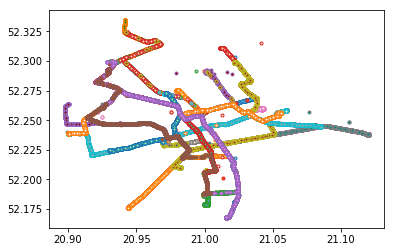

In [7]:
plot_lines(lines,False)

In [8]:
class Budynek:
    def __init__(self,points,name,height):
        self.points = points
        self.name = name
        self.height = height
    def __repr__ (self):
        return ("%s" % self.name)

In [9]:
# http://www.ranker.com/list/warsaw-buildings-and-structures/reference
# http://warszawa.naszemiasto.pl/artykul/zdjecia/kino-iluzjon,3484354,galop,16824932,t,id,tm,zid.html
budynki = []
belweder = Budynek([(52.2134507,21.0270352),(52.213505, 21.027662),(52.212808, 21.027807),(52.212749, 21.027201)],"Belweder",20)
polin = Budynek([(52.250513, 20.993801),(52.249015, 20.995244),(52.248263, 20.991671),(52.248263, 20.991671)],"POLIN",20)
muzeum_narodowe = Budynek([(52.231957, 21.023139),(52.232440, 21.025939)],"muzeum narodowe",20)
stadion = Budynek([(52.239936, 21.043051),(52.241204, 21.046313),(52.238865, 21.048727),(52.237794, 21.045154)],"Stadion Narodowy",100)
palack_brnaickich = Budynek([(52.247273, 21.011434),(52.246616, 21.011756)],"Palac Branickich",10)
kosciol_karmelitan = Budynek([(52.243653, 21.015070),(52.243226, 21.015489),(52.243706, 21.016937),(52.244100, 21.016567)],"Kosciol Karmelitan",30)
kosciol_z_loreto = Budynek([(52.256728, 21.027157),(52.256629, 21.028295),(52.256931, 21.027694)],"Kosciol Matki Bozej Loretanskiej",20)
kosciol_zbawiciela = Budynek([(52.219443, 21.017953),(52.218989, 21.017919)],"Kosciol Zbawiciela",30)
palac_pod_blacha = Budynek([(52.247186, 21.016465),(52.247038, 21.015430)],"Palac pod blacha",30)
akademia_sztuk_pieknych = Budynek([(52.239114, 21.014792),(52.239249, 21.015499),(52.239676, 21.015209),(52.239614, 21.014662)],"Akademia Sztuk Pieknych",30)
kosciol_sw_trojcy = Budynek([(52.238519, 21.011504)],"Kosciol Sw Trojcy",20)
intercontinental = Budynek([(52.232474, 21.002064),(52.232255, 21.002855),(52.232143, 21.002340),(52.232577, 21.002726)],"Intercontinental",100)
sanktuarium_matki_bozej_laskawej = Budynek([(52.248889, 21.013144)],"sanktuarium_matki_bozej_laskawej",30)
palac_kazimierzowski = Budynek([(52.240876, 21.019828),(52.240314, 21.020166),(52.240452, 21.020740),(52.240987, 21.020289)],"Palac Kazimierzowski",20)
palack_krasinskich = Budynek([(52.249539, 21.003281),(52.248872, 21.004048),(52.249082, 21.004483),(52.249660, 21.003791)],"Palac Krasinskich",20)
krolikarnia = Budynek([(52.188995, 21.028308)],"Krolikarnia",20)
palac_mostkowskich = Budynek([(52.246012, 20.999398),(52.246945, 20.998465)],"palac mostkowskich",20)
palac_kultury = Budynek([(52.233842, 21.002691),(52.229045, 21.005674),(52.230064, 21.010631),(52.234959, 21.008399)],"Palac Kultury i Nauki",150)
palac_pod_czterema_wiatrami = Budynek([(52.247116, 21.004102)],"palac pod czterema wiatrami",10)
most_poniatowski = Budynek([(52.236406, 21.037507),(52.237194, 21.042807),(52.231664, 21.047626),(52.230941, 21.042562)],"Most Poniatowski",100)
palac_potockich = Budynek([(52.242445, 21.013874)],"Palac Potockich",20)
palac_prezydencki = Budynek([(52.242794, 21.015717)],"Palac prezydencki",20)
warsaw_spire = Budynek([(52.232191, 20.984362)],"Warsaw Spire",150)
prudential = Budynek([(52.235751, 21.012245),(52.235234, 21.012401),(52.235323, 21.013010),(52.235883, 21.012648)],"Prudential",80)
palac_krolewski = Budynek([(52.247263, 21.014125),(52.247381, 21.015722),(52.248471, 21.015346),(52.248185, 21.013994)],"Zamek krolewski",50)
palac_sapiechy=Budynek([(52.254322, 21.006735)],"Palac Sapiechy",20)
kolumna_zygmunta = Budynek([(52.247210, 21.013386)],"Kolumna Zygmunta III",50)
kosciol_sw_aleksandra = Budynek([(52.229028,21.0215386)],"Kościół św. Aleksandra",30)
kosciol_sw_anny = Budynek([(52.246359, 21.013825),(52.245581, 21.014211),(52.245729, 21.015193),(52.246425, 21.014828)],"Kosciol sw Anny",60)
kosciol_sw_basi = Budynek([(52.2264624,21.006351)],"Parafia rzymskokatolicka sw. Barbary",20)
kosciol_sw_kazimierza = Budynek([(52.253134, 21.008788)],"Kosciol Sakramentek pw. sw. Kazimierza",20)
kosciol_sw_marcina = Budynek([(52.248096, 21.012459)],"Kosciol sw Marcina",20)
stara_prochownia = Budynek([(52.251956, 21.012003)],"Stara prochowniak",20)
palac_staszica = Budynek([(52.237897, 21.017773),(52.237191, 21.017994),(52.237388, 21.019088),(52.238042, 21.018471)],"Palac Staszica",20)
teatr_wielki = Budynek([(52.243487, 21.008999),(52.242613, 21.010796),(52.243158, 21.011998),(52.244367, 21.011172)],"Teatr wielki",20)
palac_tyszkiewiczow = Budynek([(52.240727, 21.016403),(52.239856, 21.016954),(52.240066, 21.017941),(52.240986, 21.017367)],"Palac Tyszkiewiczow",30)
kosciol_wizytanek = Budynek([(52.2412304,21.0160895)],"Kosciol wizytanek",15)
warsaw_trade_tower = Budynek([(52.235380, 20.982433)],"Warsaw Trade Tower",150)
palac_wilanowski = Budynek([(52.166400, 21.085851),(52.164097, 21.086175),(52.163893, 21.092312),(52.166862, 21.091679)],"Palac Wilanowski",30)
biblioteka_zaluskich = Budynek([(52.245439, 21.007618)],"Biblioteka Zaluskich",20)
zlota_44 = Budynek([(52.231150, 21.002624)],"Zlota 44",150)
zlote_tarasy = Budynek([(52.230421, 21.000736),(52.229172, 21.001573),(52.229711, 21.004620),(52.231150, 21.003708)],"Zlote tarasy",40)
zacheta = Budynek([(52.2392172,21.0100963)],"Zacheta – Narodowa Galeria Sztuki",20)
cosmopolitan= Budynek([(52.235474, 21.001674)],"Cosmopolitan",150)
gmach_pw = Budynek([(52.220274, 21.010554),(52.220307, 21.009234),(52.221214, 21.009931)],"Gmach glowny politechniki Warszawskiej",30)
buw = Budynek([(52.2424626,21.0231545)],"Biblioteka UW",20)
bristol = Budynek([(52.242213, 21.015934)],"Hotel Bristol",20)


budynki.extend([belweder,polin,muzeum_narodowe,stadion,palack_brnaickich,kosciol_karmelitan,kosciol_z_loreto,kosciol_zbawiciela,palac_pod_blacha,akademia_sztuk_pieknych])
budynki.extend([kosciol_sw_trojcy,intercontinental,sanktuarium_matki_bozej_laskawej,palac_kazimierzowski])
budynki.extend([palack_krasinskich,krolikarnia,palac_mostkowskich,palac_kultury,palac_pod_czterema_wiatrami,most_poniatowski])
budynki.extend([palac_potockich,palac_prezydencki,warsaw_spire,prudential,palac_krolewski,palac_sapiechy,kolumna_zygmunta,kosciol_sw_aleksandra])
budynki.extend([kosciol_sw_anny,kosciol_sw_basi,kosciol_sw_kazimierza,kosciol_sw_marcina,stara_prochownia,palac_staszica])
budynki.extend([teatr_wielki,palac_tyszkiewiczow,kosciol_wizytanek,warsaw_trade_tower,palac_wilanowski,biblioteka_zaluskich])
budynki.extend([zlota_44,zlote_tarasy,zacheta,cosmopolitan,gmach_pw,buw,bristol])

### Lista budynków rozpatrywanych w naszej analizie:

In [10]:
print('Liczba budynków: ',len(budynki))
for bud in budynki:
    print(bud)

Liczba budynków:  47
Belweder
POLIN
muzeum narodowe
Stadion Narodowy
Palac Branickich
Kosciol Karmelitan
Kosciol Matki Bozej Loretanskiej
Kosciol Zbawiciela
Palac pod blacha
Akademia Sztuk Pieknych
Kosciol Sw Trojcy
Intercontinental
sanktuarium_matki_bozej_laskawej
Palac Kazimierzowski
Palac Krasinskich
Krolikarnia
palac mostkowskich
Palac Kultury i Nauki
palac pod czterema wiatrami
Most Poniatowski
Palac Potockich
Palac prezydencki
Warsaw Spire
Prudential
Zamek krolewski
Palac Sapiechy
Kolumna Zygmunta III
Kościół św. Aleksandra
Kosciol sw Anny
Parafia rzymskokatolicka sw. Barbary
Kosciol Sakramentek pw. sw. Kazimierza
Kosciol sw Marcina
Stara prochowniak
Palac Staszica
Teatr wielki
Palac Tyszkiewiczow
Kosciol wizytanek
Warsaw Trade Tower
Palac Wilanowski
Biblioteka Zaluskich
Zlota 44
Zlote tarasy
Zacheta – Narodowa Galeria Sztuki
Cosmopolitan
Gmach glowny politechniki Warszawskiej
Biblioteka UW
Hotel Bristol


## Mapa linii tramwaji Warszawskich z naniesionymi budynkami
Współrzędne budynków umieszczone na mapie wraz z trasami tramwajowymi zaobserwowanymi podczas naszego badania. Można zauważyć duże skupisko obiektów położonych w okolicach starego miasta. 

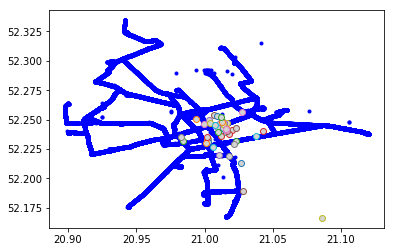

In [11]:
plot_lines([],True,True,'b.')

In [12]:
def CountDistance(lat1, lng1, lat2, lng2):
    earthRadius = 6371000.0;
    
    dLat = math.radians(lat2-lat1)
    dLng = math.radians(lng2-lng1)
    a = math.sin(dLat/2) * math.sin(dLat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *\
        math.sin(dLng/2) * math.sin(dLng/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    dist = (earthRadius * c)
    
    return dist 

In [13]:
def coorDiff(dist):
    mpd_lat = 111271.67312454112
    mpd_lon = 68325.95947109786
    return dist/mpd_lat, dist/mpd_lon

In [14]:
nearBuildings = {}
dist = 300
coorDelta = coorDiff(dist)
for oneLine in arrayWithData:
    pointsCounter = 0
    for budynek in budynki:
        visited = False
        for point in budynek.points:
            for index, position in oneLine.loc[(oneLine.Lat >= point[0] - coorDelta[0]) &\
                                              (oneLine.Lat <= point[0] + coorDelta[0]) &\
                                              (oneLine.Lon >= point[1] - coorDelta[1]) &\
                                              (oneLine.Lon <= point[1] + coorDelta[1])].iterrows():
                if CountDistance(position.Lat, position.Lon, point[0], point[1]) < dist:
                    visited = True
                    break
            if visited:
                break
        if visited:
            pointsCounter += 1
            continue
    nearBuildings[oneLine.iloc[0].FirstLine] = pointsCounter

In [15]:
lines_buildings_df=pd.DataFrame()
lines_buildings_df = lines_buildings_df.assign(Numer_linii = pd.Series(list(nearBuildings.keys())))
lines_buildings_df = lines_buildings_df.assign(Liczba_budynkow=pd.Series(list(nearBuildings.values())))
lines_buildings_df.sort_values('Liczba_budynkow',ascending =False).head()

,Numer_linii,Liczba_budynkow
13,18,25
18,25,24
3,4,19
10,14,15
19,26,14


### Linia nr. 18 - 25 zabytków

Liczba budynków  dla linii 18: 25


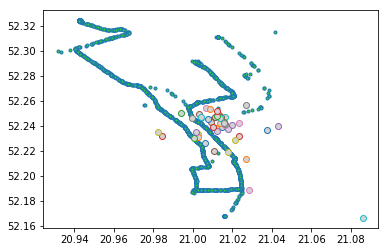

In [16]:
print("Liczba budynków  dla linii 18: " + str(nearBuildings[18]))
plot_lines([18],False,True)

### Linia nr. 25 - 24 zabytki

Liczba budynków  dla linii 25: 24


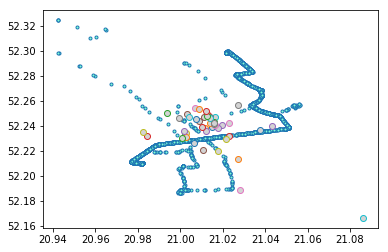

In [17]:
print("Liczba budynków  dla linii 25: " + str(nearBuildings[25]))
plot_lines([25],False,True)

### Linia nr. 4 - 4 zabytki

Liczba budynków dla linii 4: 19


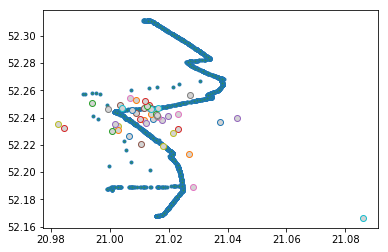

In [18]:
print("Liczba budynków dla linii 4: " + str(nearBuildings[4]))
plot_lines([4],False,True)

## Podsumowanie
Jeśli chcemy stosunkowo niskim kosztem pokazać komuś jak największą liczbę Warszawskich zabytków należy wybrać jedną z linii: 18, 25, 4. Dla porównania "City Sightseeing Warsaw Hop On Hop Off Tour" czyli Warszawskie wycieczki objazdowe pokazują jedynie 10 najciekawszych zabytków i są wielokrotnie droższe od naszego rozwiązania. 

# Średnie prędkości

W tej sekcji zostanie przeprowadzona analiza prędkości tramwajów w ciągu całego okresu pomiarów. Postaramy się wyróżnić anomalie oraz wyznaczyć najszybsze trasy tramwajowe w Warszawie.

In [19]:
df = pd.DataFrame()
path = "data_csv\\2017_05_"
# path = "pd4python\\data_csv\\2017_05_"
csv = ".csv"
for num in range(14,30):
    tempPath = path+str(num)+csv
    #print(tempPath)
    df = pd.concat([df,pd.read_csv(tempPath,low_memory=False)])

In [20]:
data = df
data = data[(20.87 < data.Lon) & (data.Lon < 21.15) & (52.16 < data.Lat) & (data.Lat < 52.34)]
arrayWithData = list()
for line in lines:
    dataTemp = data[data.FirstLine==line]
    dataTempLon = dataTemp[np.abs(dataTemp.Lon-dataTemp.Lon.mean())<3*dataTemp.Lon.std()]
    dataTempLonLat = dataTempLon[np.abs(dataTempLon.Lat-dataTempLon.Lat.mean())<3*dataTempLon.Lat.std()]
    arrayWithData.append(dataTempLonLat)

In [21]:
counterLine = []
counterNumber = []
for line in arrayWithData:
    counterLine.append(line.iloc[0].FirstLine)
    counterNumber.append(line.FirstLine.count())

## Analiza ilości pomiarów podczas dwutygodniowego okresu zbierania danych

Można zauważyć znaczącą dominację ilości pomiarów dla linii 9. Może to oznaczać większą liczbę taborów poruszających się w tej ramach tej linii. 

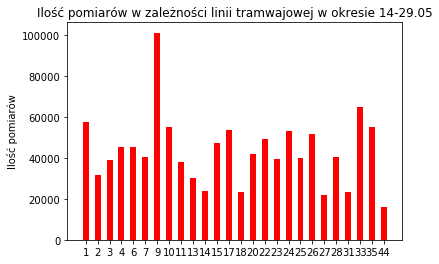

In [22]:
ind = np.arange(len(lines))  # the x locations for the groups
width = 0.5       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, counterNumber, width, color='r')
lineStr = tuple(map(lambda x: str(x), lines))
ax.set_xticklabels(lineStr)
ax.set_ylabel('Ilość pomiarów')
ax.set_title('Ilość pomiarów w zależności linii tramwajowej w okresie 14-29.05')
ax.set_xticks(ind)
plt.show()

In [23]:
datesSeries = pd.Series(map(lambda x: str(datetime.strptime(x,"%Y-%m-%dT%H:%M:%S").date()),data.Time))
dayofweekSeries = pd.Series(map(lambda x: datetime.strptime(x,"%Y-%m-%dT%H:%M:%S").isoweekday(),data.Time))
data = data.assign(Date=datesSeries.values)
data = data.assign(DayOfWeek=dayofweekSeries.values)
data = data.drop_duplicates()

In [24]:
data_grouped = data.groupby(['Date']).size()
data_grouped_dropped=data_grouped.drop(['2017-05-14', '2017-05-15'])
unique_dates = data.Date.unique()

In [25]:
dates = data_grouped_dropped.index.values
counter_per_date = data_grouped_dropped.values
unique_dates = unique_dates[2:]

## Rozkład ilości zebranych pomiarów w czasie

Można tu zauważyć prostą zależność: podczas weekendu na trasy wyjeżdża blisko dwukrotnie mniejsza ilość taborów.

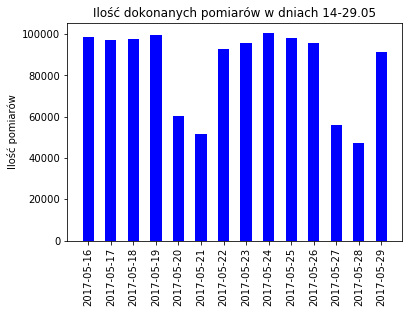

In [26]:
ind = np.arange(len(unique_dates))
width = 0.5       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, counter_per_date, width, color='b')

ax.set_xticklabels(tuple(unique_dates),rotation='vertical')
ax.set_ylabel('Ilość pomiarów')
ax.set_title('Ilość dokonanych pomiarów w dniach 14-29.05')
ax.set_xticks(ind)
plt.show()

In [27]:
N = 7
first_week = []
first_week.append(counter_per_date[13])
first_week.extend(list(counter_per_date[0:6]))
first_week = tuple(first_week)
second_week = list(counter_per_date[6:13])
second_week = tuple(second_week)

## Rozkład ilości względem dnia tygodnia

Na przestrzeni dwóch tygodni nie widać anomalii w ilości dokonanych pomiarów. Różnice mogą wynikać z czynników takich jak przejazdy techniczne, błędów związanych z interwałem czasowym pobierania danych z systemu ZTM.

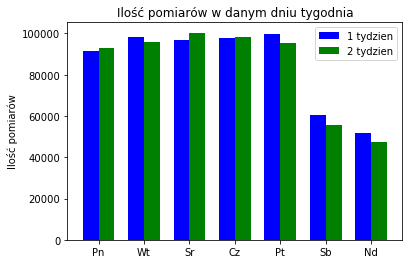

In [28]:
ind = np.arange(len(first_week))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(ind, first_week, width, color='b')


rects2 = ax.bar(ind + width, second_week, width, color='g')

# add some text for labels, title and axes ticks
ax.set_ylabel('Ilość pomiarów')
ax.set_title('Ilość pomiarów w danym dniu tygodnia')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Pn', 'Wt', 'Sr', 'Cz', 'Pt','Sb', 'Nd'))

ax.legend((rects1[0], rects2[0]), ('1 tydzien', '2 tydzien'))



#autolabel(rects1)
#autolabel(rects2)

plt.show()

In [29]:
timestamps = pd.Series(map(lambda x: datetime.strptime(x,"%Y-%m-%dT%H:%M:%S").timestamp(),data.Time))
data = data.assign(Timestamp=timestamps.values)

In [30]:
data_line_brigade = []

for line in lines:
    dataTemp = data[data.FirstLine==line]
    unique_brigades = dataTemp.Brigade.unique()
    for brigade in unique_brigades:
        data_line_brigade.append(dataTemp[dataTemp.Brigade == brigade])

In [31]:
for temp_df in data_line_brigade:
    temp_df=temp_df.sort_values('Timestamp')

In [32]:
N = data_line_brigade[0].count().Status
lon = data_line_brigade[0].Lon.values
lat = data_line_brigade[0].Lat.values
timestamps = data_line_brigade[0].Timestamp.values

In [33]:
mean_speeds = []
first_line = []
brigade = []

for single_data in data_line_brigade:
    N = single_data.count().Status
    lon = single_data.Lon.values
    lat = single_data.Lat.values
    timestamps = single_data.Timestamp.values
    speed = []

    for i in range(0,N-1):
        dist = CountDistance(lat[i],lon[i],lat[i+1],lon[i+1])
        if timestamps[i+1]-timestamps[i] > 0:
            speed_temp = dist/(timestamps[i+1]-timestamps[i])
            speed.append(np.abs(speed_temp*3.6))

    mean_speeds.append(np.mean(speed))
    first_line.append(single_data.FirstLine.iloc[0])
    brigade.append(single_data.Brigade.iloc[0])

In [34]:
mean_speeds_series = pd.Series(mean_speeds)
first_line_series = pd.Series(first_line)
brigade_series = pd.Series(brigade)

In [35]:
speed_line_brigade_df = pd.DataFrame()
speed_line_brigade_df = speed_line_brigade_df.assign(FirstLine=first_line)
speed_line_brigade_df = speed_line_brigade_df.assign(Brigade=brigade)
speed_line_brigade_df = speed_line_brigade_df.assign(MeanSpeed=mean_speeds)


### Średnia prędkość dla poszczególnych linii oraz brygad w ramach linii tramwajowej

In [36]:
speed_line_brigade_df.head()

,FirstLine,Brigade,MeanSpeed
0,1,13,12.552557
1,1,16,12.299541
2,1,9,12.228868
3,1,10,11.808488
4,1,4,11.286600


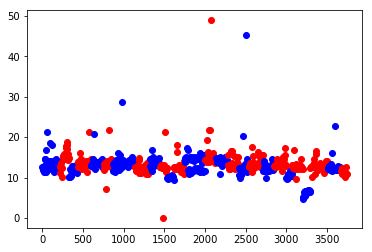

In [37]:
def plotDataFrame(input_df):
    i=1
    xcounter=0
    for line in lines:
        if i==1:
            i=-i
            temp_df = input_df[input_df.FirstLine == line]
            elems = len(temp_df.index)
            rng = list(map(lambda x: x*5,range(xcounter,xcounter+elems)))
            plt.plot(rng,temp_df.MeanSpeed.values,'bo')
            xcounter = xcounter+elems
        else:
            i=-i
            temp_df = input_df[input_df.FirstLine == line]
            elems = len(temp_df.index)
            rng = list(map(lambda x: x*5,range(xcounter,xcounter+elems)))
            plt.plot(rng,temp_df.MeanSpeed.values,'ro')
            xcounter = xcounter+elems

    #plt.plot(np.arange(750)[1::2],speed_line_brigade_df.MeanSpeed.values[1::2],'ro')
    plt.show()

plotDataFrame(speed_line_brigade_df)

#### Na powyższym wykresie możemy zauważyć rozkład prędkości dla kolejnych linii (kolejne liniie są oznaczone innym kolorem - linia 1 - niebieski, linia 2 - czerwony, linia 3 - niebieski itd.) Każdy punkt określa prędkość średnią dla danego taboru

#### Poniższy wykres prezentuje dane po redukcji elementów które można oznaczyć jako błąd gruby.

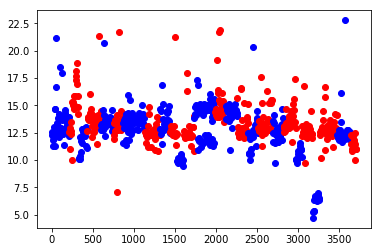

In [38]:
speed_line_brigade_df_reduced = speed_line_brigade_df[speed_line_brigade_df.MeanSpeed < 25]
speed_line_brigade_df_reduced = speed_line_brigade_df_reduced[speed_line_brigade_df_reduced.MeanSpeed > 2]

plotDataFrame(speed_line_brigade_df_reduced)

In [39]:
median_speed = []
for line in lines:
    temp_df = speed_line_brigade_df_reduced[speed_line_brigade_df_reduced.FirstLine == line]
    median_speed.append(temp_df.MeanSpeed.median())

### Mediana prędkości
Kolejnym krokiem było wyciągnięcie mediany prędkości ze wszystkich taborów danej linii. Po wizualizacji danych można zauważyć anomalię dla linii 31. Jest to liniaa poruszająca się po tak zwanym "Mordorze" czyli kolejno ulicach:
- Marynarska
- Wołoska
- Woronicza

Jest to obszar miasta w którym swoje biura posiada bardzo wiele korporacji. Jest to najbardziej zakorkowany obszar w godzinach szczytu w Warszawie. Pokrywa się to więc z naszymi wynikami.

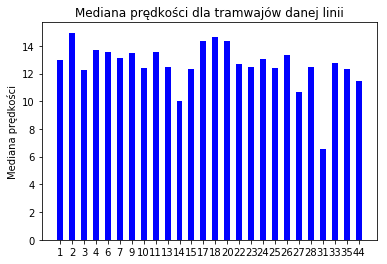

In [40]:
ind = np.arange(len(lines))  # the x locations for the groups
width = 0.5       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, median_speed, width, color='b')
lineStr = tuple(map(lambda x: str(x), lines))
ax.set_xticklabels(lineStr)
ax.set_ylabel('Mediana prędkości')
ax.set_title('Mediana prędkości dla tramwajów danej linii')
ax.set_xticks(ind)
plt.show()


In [41]:
mean_speed_lines_df = pd.DataFrame()
mean_speed_lines_df = mean_speed_lines_df.assign(Numer_linii = pd.Series(lines))
mean_speed_lines_df = mean_speed_lines_df.assign(Mediana_predkosci=pd.Series(median_speed))
mean_speed_lines_df = mean_speed_lines_df.sort_values('Mediana_predkosci',ascending=False)
mean_speed_lines_df.columns = ['Numer linii','Mediana prędkości km/h']
mean_speed_lines_df

,Numer linii,Mediana prędkości km/h
1,2,14.944725
13,18,14.652676
12,17,14.368540
14,20,14.324349
3,4,13.683783
4,6,13.538897
8,11,13.532597
6,9,13.499928
19,26,13.316828
5,7,13.121489


### Najszybsze linie tramwajowe:
- Linia nr. 2

Linia ta porusza się po bardzo szybkiej trasie pomiędzy Młocinami, a Trachominem.

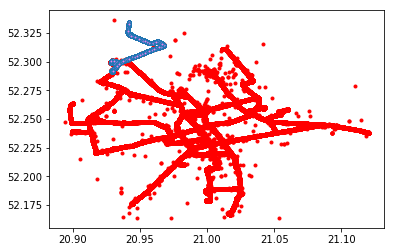

In [42]:
plot_lines([2])

- Linia nr. 18

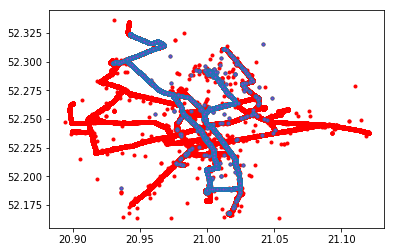

In [43]:
plot_lines([18])

- Linia nr. 17

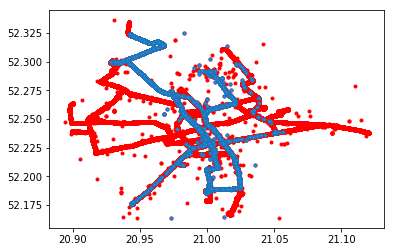

In [44]:
plot_lines([17])

- Linia nr. 20

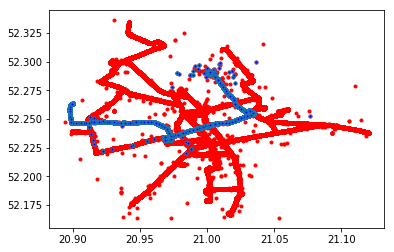

In [45]:
plot_lines([20])

- Linia nr. 31

Wspomiana, najwolniejsza ze wszystkich, linia skrócona po 'Mordorze'

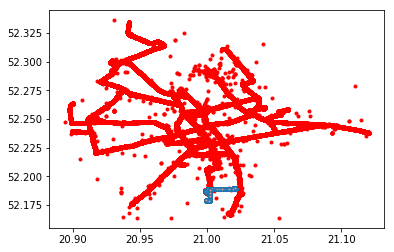

In [46]:
plot_lines([31])

# Clustering

Z tej sekcji zostanie przeprowadzona analiza skupień tramwajów. Dla wybranego dnia pomiarów i każdej godziny w tym dniu wybrany zostanie moment charakteryzujący się największą ilością klastrów. Celem tej analizy jest sprawdzenie czy skupienia w ogóle występują i czy ich rozkład zmienia się w trakcie dnia, a jęśli tak to czy można to jakoś powiazać z godzinami szczytu które kazdemu Warszawiakowi są znane aż nazbyt dobrze.

In [47]:
# path = "{}\\pd4python\\data_csv\\".format(os.getcwd())
path = "data_csv\\"
allFiles = os.listdir(path)
allFiles

['2017_05_14.csv',
 '2017_05_15.csv',
 '2017_05_16.csv',
 '2017_05_17.csv',
 '2017_05_18.csv',
 '2017_05_19.csv',
 '2017_05_20.csv',
 '2017_05_21.csv',
 '2017_05_22.csv',
 '2017_05_23.csv',
 '2017_05_24.csv',
 '2017_05_25.csv',
 '2017_05_26.csv',
 '2017_05_27.csv',
 '2017_05_28.csv',
 '2017_05_29.csv']

Na podstawie poprzednich analiz wybrany został dzień 25-05-2017, ze względu na ilość pomiarów zebranych tego dnia. Filtrowanie Danych tym razem ma charakter globalny (dla wszystkich linii jednocześnie) a nie lokalny jak poprzednio (dla każdej lini z osobna). Takie uproszczenie zostało dopuszczone ze względu na niewielkie pogorszenie się jakości filtrowania w porównianiu z poprzednim sposobem.

Ponadto kolumna Time została zmieniona ze ```string``` na ```datetime``` aby łatwiej operowało się na godzinach.

In [48]:
filename = "{}{}".format(path, allFiles[11])
df = pd.read_csv(filename)
df = df[(20.87 < df.Lon) & (df.Lon < 21.15) & (52.16 < df.Lat) & (df.Lat < 52.34)]
df = df[np.abs(df.Lon-df.Lon.mean()) < 3*df.Lon.std()]
df = df[np.abs(df.Lat-df.Lat.mean()) < 3*df.Lat.std()]
df.Time = pd.to_datetime(df.Time)
df.head()

,Status,FirstLine,Lon,Lines,Time,Lat,LowFloor,Brigade
0,RUNNING,22,21.001453,22,2017-05-25 12:08:38,52.227650,False,4
1,RUNNING,4,21.021187,4,2017-05-25 12:08:53,52.214374,False,4
2,RUNNING,4,21.021202,4,2017-05-25 12:08:50,52.214390,False,4
3,RUNNING,22,20.943861,22,2017-05-25 12:08:52,52.271110,False,8
4,RUNNING,4,21.029495,4,2017-05-25 12:08:00,52.290581,False,10


Poniższy etap jest najbardziej czasochłonny obliczeniowo. Jego celem jest wybranie, dla każdej godziny, 30-sto sekundowego przedziału czasu w którym ilość klastrów jest najwieksza.

Do analizy została wybrana funkcja ```DBSCAN``` z pakietu ```sklearn.cluster``` jako, że wydaje się najbardziej stosowna dla rozważanego problemu.

Nie zdecydowaliśmy się na standaryzację danych ze względu na łatwiejsze ustalenie odpowiedniej wartości parametru ```eps``` w funkcji ```DBSCAN```. Wartość 0.0006 przy operowaniu na niezmienionych współrzędnych odpowiada maksymalnej odległości tramwajów ok 50m. Minimalna ilość tramwajów która może zostać uznana jako klater została ustalona jako 4. Wszystkie pozostałe parametry wywołania funkcji ```DBSCAN``` pozostają domyślne.

In [49]:
clusters = {}

for h in range(24):
    clusters[h] = 0, 0, 0
    for m in range(60):
        for s in range(2):
            if s == 0:
                X = df.loc[(df.Time.dt.hour == h) & (df.Time.dt.minute == m) & (df.Time.dt.second < 30)]
            else:
                X = df.loc[(df.Time.dt.hour == h) & (df.Time.dt.minute == m) & (df.Time.dt.second > 30)]
            if X.shape[0] == 0:
                continue
                
            X = X.loc[:, ["Lon", "Lat"]].as_matrix()
            db = DBSCAN(eps=0.0006, min_samples=4).fit(X)
            core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
            core_samples_mask[db.core_sample_indices_] = True
            labels = db.labels_
            unique_labels = set(labels)
            if clusters[h][0] < len(unique_labels):
                clusters[h] = len(unique_labels), m, s
                
clusters

{0: (1, 33, 0),
 1: (1, 0, 1),
 2: (0, 0, 0),
 3: (1, 52, 1),
 4: (2, 52, 1),
 5: (4, 32, 1),
 6: (9, 36, 0),
 7: (9, 11, 1),
 8: (7, 9, 1),
 9: (7, 31, 1),
 10: (7, 7, 0),
 11: (9, 23, 0),
 12: (8, 31, 1),
 13: (9, 12, 1),
 14: (8, 1, 0),
 15: (7, 59, 1),
 16: (4, 15, 0),
 17: (4, 15, 1),
 18: (5, 25, 1),
 19: (6, 28, 1),
 20: (6, 7, 1),
 21: (8, 1, 1),
 22: (4, 7, 1),
 23: (3, 15, 1)}

Jak można było się domyślić, pierwsze 4 godziny dnia (lub nocy, jak kto woli) nie są zbyt porywające. O godzinie **2** danych całkowicie brak. O **0**, **1**, **3** mamy tylko jedną kategorię co świadczy o tym że nie został wykryty żaden klaster. Z tego względu w dalszej wizualizacji 4 pierwsze przypadki zostaną pominięte.

In [50]:
# odkomentować i odpalić dopiero jak już wszystko będzie gotowe
# przed samym konwertowaniem do htmla

# %%javascript
# IPython.OutputArea.prototype._should_scroll = function(lines) {
#     return false;
# }

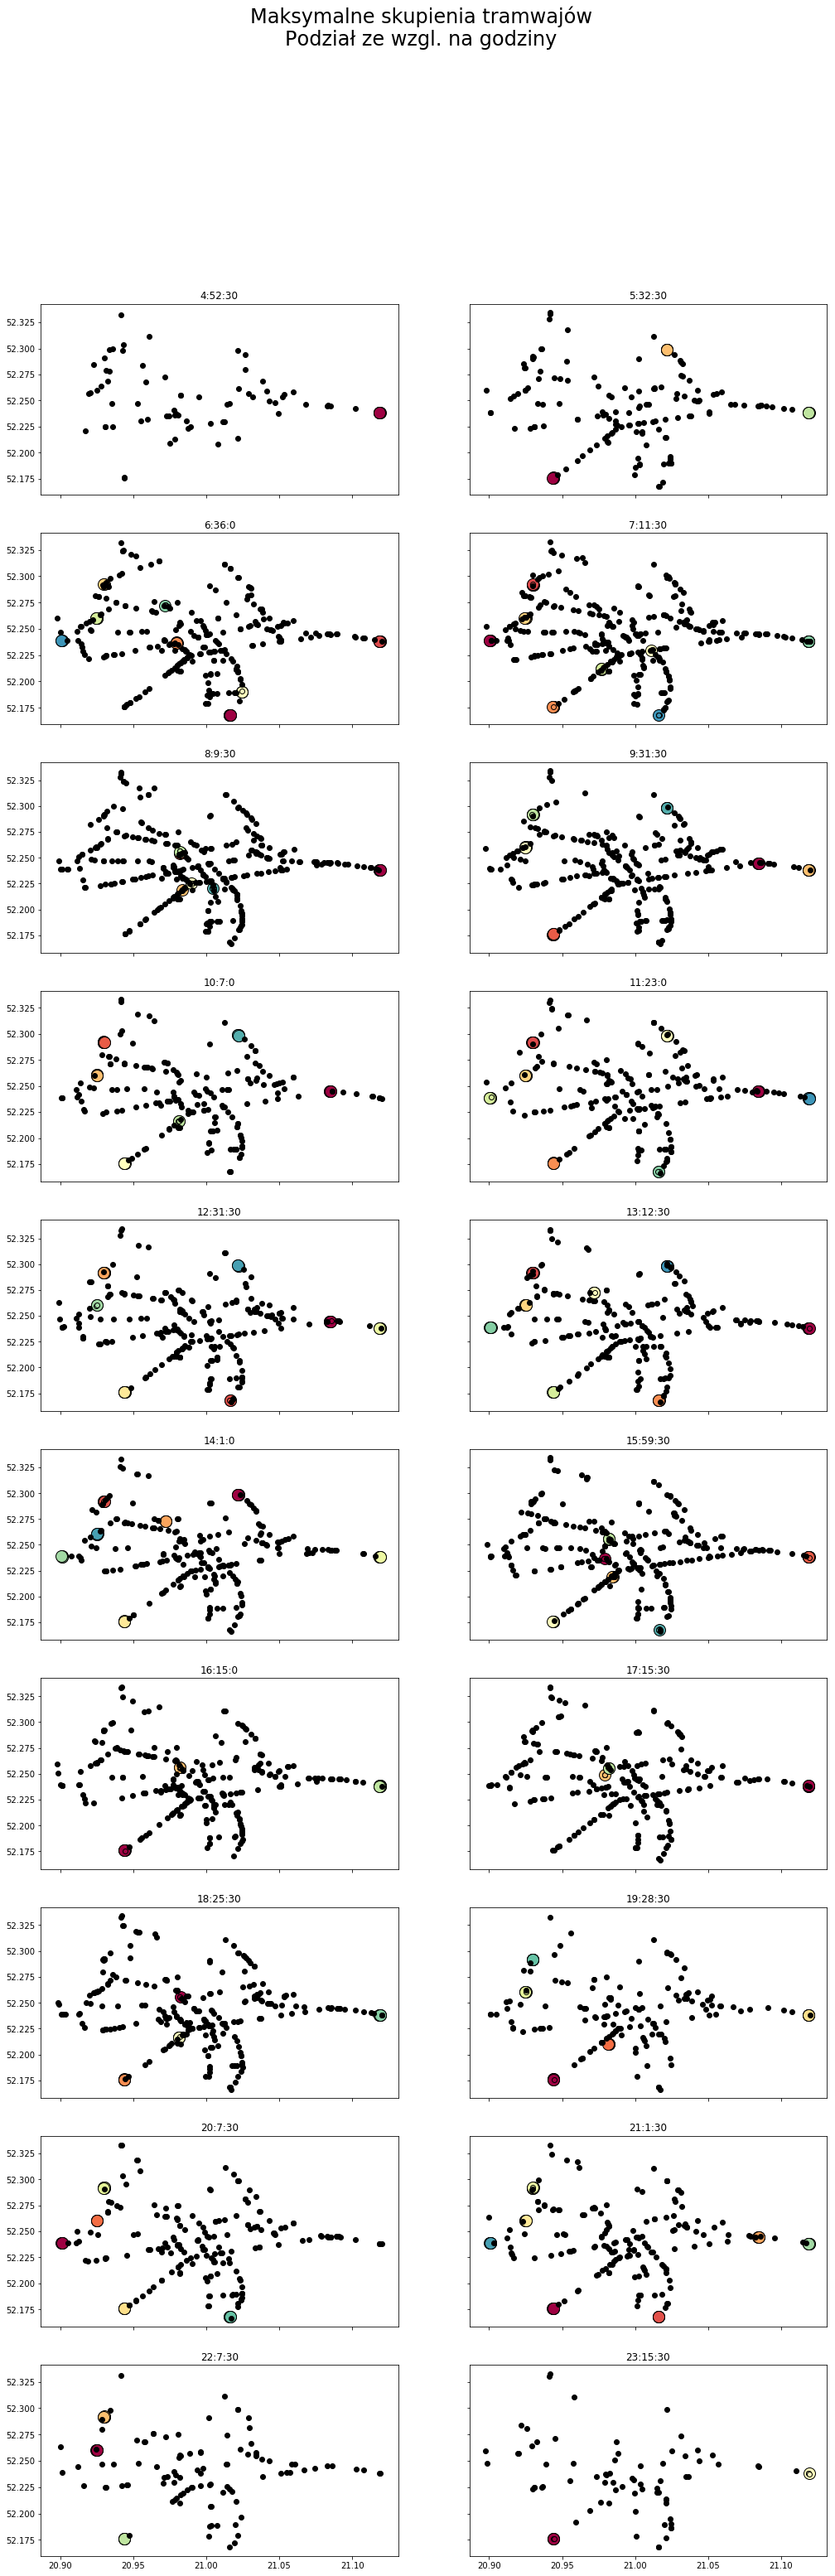

In [51]:
plots = ((0,0), (0,0), (0,0), (0,0), (0,0), (0,0), (0,0), (0,0), (0,0), (0,0))
f, plots = plt.subplots(10, 2, sharex='col', sharey='row')
f.suptitle('Maksymalne skupienia tramwajów\nPodział ze wzgl. na godziny', fontsize=24)
f.set_size_inches(17, 50)

for r in range(10):
    for c in range(2):
        h = 4 + 2 * r + c
        m = clusters[h][1]
        s = clusters[h][2]
        if s == 0:
            X = df.loc[(df.Time.dt.hour == h) & (df.Time.dt.minute == m) & (df.Time.dt.second < 30)]
        else:
            X = df.loc[(df.Time.dt.hour == h) & (df.Time.dt.minute == m) & (df.Time.dt.second > 30)]
        if X.shape[0] == 0:
            continue

        X = X.loc[:, ["Lon", "Lat"]].as_matrix()
        db = DBSCAN(eps=0.0006, min_samples=4).fit(X)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        unique_labels = set(labels)
        
        colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
        for k, col in zip(unique_labels, colors):
            if k == -1:
                col = 'k'
            class_member_mask = (labels == k)

            xy = X[class_member_mask & core_samples_mask]
            plots[r][c].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                     markeredgecolor='k', markersize=14)

            xy = X[class_member_mask & ~core_samples_mask]
            plots[r][c].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                     markeredgecolor='k', markersize=6)
            plots[r][c].set_title('{}:{}:{}'.format(h, m, 30*s))

plt.show()

Powyższe wykresy wizualizują rozmieszczenia grup dla poszczególych godzin. Czarne punkty są to dane niezaklasyfikowane do żadnej grupy. Z powyższych wykresów widać, że w większości przypadków znalezione klastry się pokrywają i są umiejscowoine gdzie na skrajach mapy. Z racji znajomści planu Warszawy już na pierwszy rzut oka widać, że kolorowe plamy są to okolice pętli tramwajowych. Min 4 tramwaje i max odległość 50m to jak na tramwajowo-warszawsie warunki dosyć wygórowane wartości więc nie jest dziwnym to, że w większości wykryliśmy tramwaju ruszające z zajezdni na trasę.

Warto jednak zwrócić uwagę na godziny **8** oraz **15** czyli znane i lubiane godziny szytu komunikacyjnego. Większość wykrytych grup przesunęła się do centrum. Widać, że miejscami najbardziej zatramwajonymi są Plac Zawiszy, Rondo Daszyńskiego i Dworzec Centralny to bardzo dobrze pokrywa się z obserwacjami podczas przemieszczania się po Warszawie.